# Лабораторная работа №4

In [74]:
import matplotlib.pyplot as plt
import numpy as np

from typing import Union

from scipy.special import binom

from utils import *

In [75]:
handler = Signal_Handler()
display = Signal_Display()

## Задание 1

In [76]:
x, y, dt = handler.make_signal('cos', interval = (0, 0.1), A = 1, w = Converter(f = [50, 150, 450]).w)
xfft, yfft = handler.find_spectrum(y, dt)

c:\Users\Sanya\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


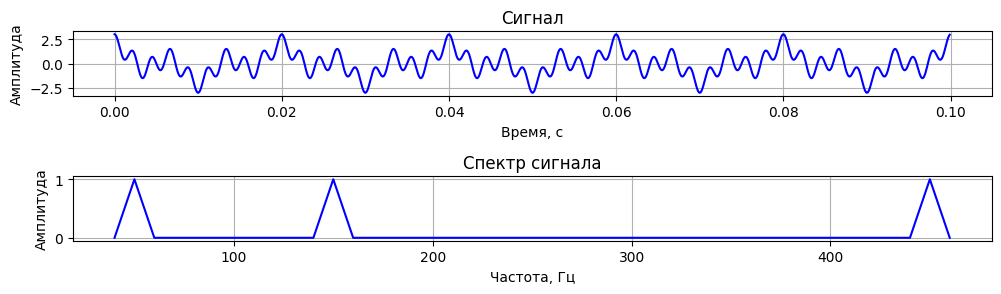

In [77]:
display.make_plot(0, x, y, title = 'Сигнал')
display.make_plot(1, xfft, yfft, title = 'Спектр сигнала', is_spectrum = True, interval = (40, 460))

display.plot()

## Задание 2

In [78]:
class Butterworth_filter:

    def __init__(self, signal: np.ndarray, dt: float):
        handler = Signal_Handler()
        self.xfft, self.yfft = handler.find_spectrum(signal, dt)

    def update_signal(self, signal : np.ndarray, dt: float):
        self.xfft, self.yfft = handler.find_spectrum(signal, dt)

    def H_w(self, w: np.ndarray, wc: Union[float, list], mode: str = 'LPF', order: int = 2):

        arg = [1j * np.pi * (2 * k + order - 1) / (2 * order) for k in range(order)]
        sk = np.mean(wc) * np.exp(arg)
        s = 1j * w[np.newaxis].T
        
        if mode == 'LPF':
            numer = wc ** order
            
        elif mode == 'HPF':
            numer = w ** order
            
        elif mode == 'BPF':
            return self.H_w(self.xfft, wc[0], 'LPF', order) * \
                   self.H_w(self.xfft, wc[1], 'HPF', order)

        elif mode == 'BF':
            B = wc[1] - wc[0]
            w0 = wc[0] * wc[1]
            s = (B * s) / (s ** 2 + w0)
            numer = np.sum(wc) ** order / order
            
        return numer / (order * np.prod(s - sk, axis = 1))       
        
    def LPF(self, wc: float, order: int = 2):        
        return handler.from_spectrum(np.abs(self.H_w(self.xfft, wc, 'LPF', order) * self.yfft))
    
    def HPF(self, wc: float, order: int = 2):      
        return handler.from_spectrum(np.abs(self.H_w(self.xfft, wc, 'HPF', order) * self.yfft))
    
    def BPF(self, wc1: float, wc2: float, order: int = 2):
        Hw = self.H_w(self.xfft, wc1, 'LPF', order) * self.H_w(self.xfft, wc2, 'HPF', order)
        return handler.from_spectrum(np.abs(Hw * self.yfft))
    
    def BF(self, wc1: float, wc2: float, order: int = 2):
        return handler.from_spectrum(np.abs(
            self.H_w(self.xfft, [wc1 , wc2], 'BF', order) * self.yfft))

In [79]:
butterworth = Butterworth_filter(y, dt)

In [80]:
order = 2
wc = 70

y1 = butterworth.LPF(wc = wc, order = order) 
yfft1 = handler.find_spectrum(y1, dt)[1]
Hw = butterworth.H_w(butterworth.xfft, wc, 'LPF', order = order)

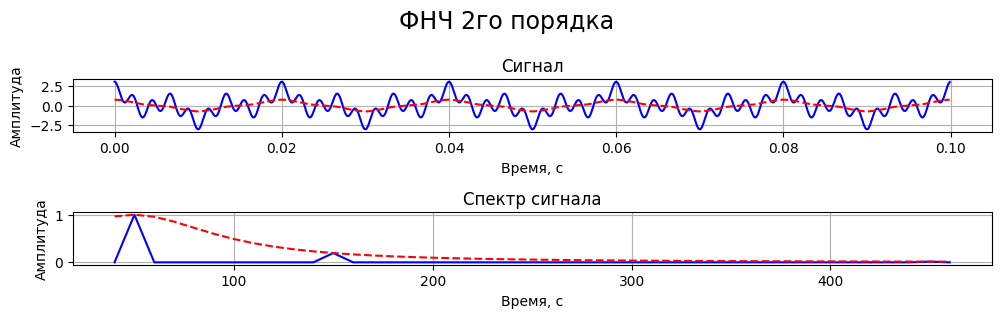

In [81]:
display.clear()

display.make_plot(0, x, y, title = 'Сигнал')
display.make_plot(0, x, y1, color = 'red', linestyle = '--')

display.make_plot(1, xfft, yfft1, title = 'Спектр сигнала', is_spectrum = True, interval = (40, 460))
display.make_plot(1, xfft, np.abs(Hw), interval = (40, 460), color = 'red', linestyle = '--')

display.plot(title = f'ФНЧ {order}го порядка')

## Задание 3

In [82]:
order = 2
wc = 300

y1 = butterworth.HPF(wc = wc, order = order) 
yfft1 = handler.find_spectrum(y1, dt)[1]
Hw = butterworth.H_w(butterworth.xfft, wc, 'HPF', order = order)

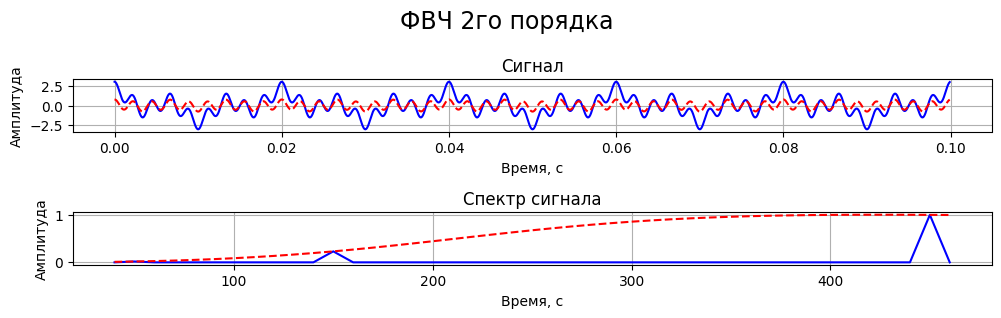

In [83]:
display.clear()

display.make_plot(0, x, y, title = 'Сигнал')
display.make_plot(0, x, y1, color = 'red', linestyle = '--')

display.make_plot(1, xfft, yfft1, title = 'Спектр сигнала', is_spectrum = True, interval = (40, 460))
display.make_plot(1, xfft, np.abs(Hw), interval = (40, 460), color = 'red', linestyle = '--')

display.plot(title = f'ФВЧ {order}го порядка')

## Задание 4

In [84]:
order = 2
wc1 = 140
wc2 = 160

y1 = butterworth.BPF(wc1 = wc1, wc2 = wc2, order = order) 
yfft1 = handler.find_spectrum(y1, dt)[1]
Hw = butterworth.H_w(butterworth.xfft, [wc1, wc2], 'BPF', order = order)

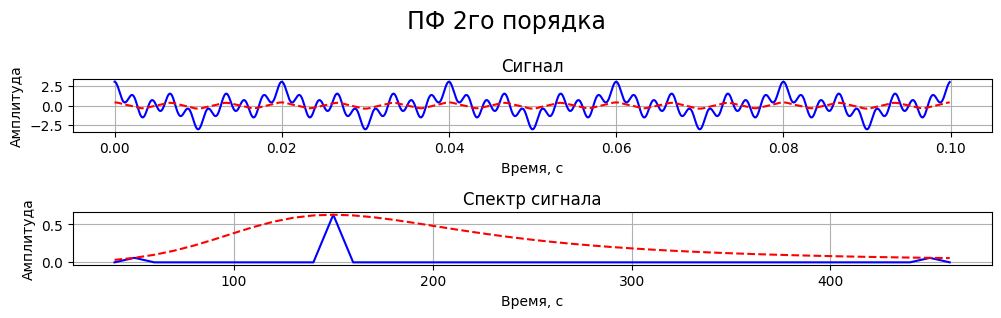

In [85]:
display.clear()

display.make_plot(0, x, y, title = 'Сигнал')
display.make_plot(0, x, y1, color = 'red', linestyle = '--')

display.make_plot(1, xfft, yfft1, title = 'Спектр сигнала', is_spectrum = True, interval = (40, 460))
display.make_plot(1, xfft, np.abs(Hw), interval = (40, 460), color = 'red', linestyle = '--')

display.plot(title = f'ПФ {order}го порядка')

In [86]:
order = 2
wc1 = 140
wc2 = 160

y1 = butterworth.BF(wc1 = wc1, wc2 = wc2, order = order) 
yfft1 = handler.find_spectrum(y1, dt)[1]
Hw = butterworth.H_w(butterworth.xfft, [wc1, wc2], 'BF', order = order)

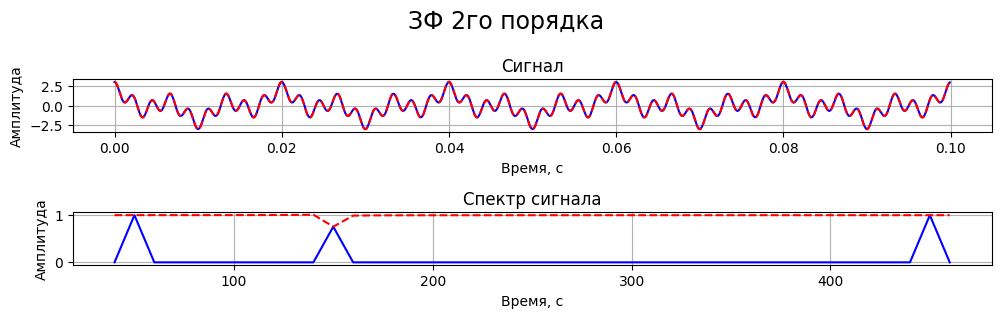

In [87]:
display.clear()

display.make_plot(0, x, y, title = 'Сигнал')
display.make_plot(0, x, y1, color = 'red', linestyle = '--')

display.make_plot(1, xfft, yfft1, title = 'Спектр сигнала', is_spectrum = True, interval = (40, 460))
display.make_plot(1, xfft, np.abs(Hw), interval = (40, 460), color = 'red', linestyle = '--')

display.plot(title = f'ЗФ {order}го порядка')

## Задание 5

In [88]:
order = 4
wc = 70

y1 = butterworth.LPF(wc = wc, order = order) 
yfft1 = handler.find_spectrum(y1, dt)[1]
Hw = butterworth.H_w(butterworth.xfft, wc, 'LPF', order = order)

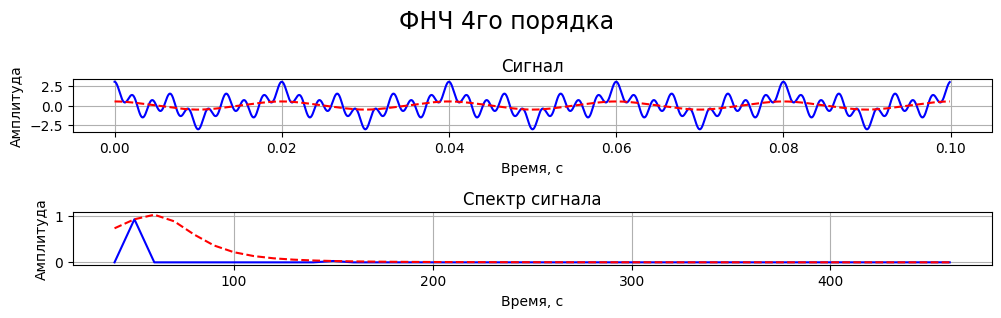

In [89]:
display.clear()

display.make_plot(0, x, y, title = 'Сигнал')
display.make_plot(0, x, y1, color = 'red', linestyle = '--')

display.make_plot(1, xfft, yfft1, title = 'Спектр сигнала', is_spectrum = True, interval = (40, 460))
display.make_plot(1, xfft, np.abs(Hw), interval = (40, 460), color = 'red', linestyle = '--')

display.plot(title = f'ФНЧ {order}го порядка')

## Задание 6

In [90]:
y1 = y + np.random.normal(0, 1, y.size)
yfft1 = handler.find_spectrum(y1, dt)[1]

butterworth.update_signal(y1, dt)

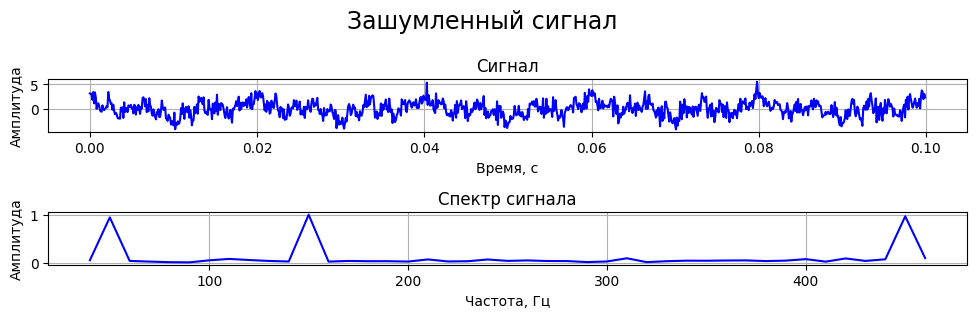

In [91]:
display.clear()

display.make_plot(0, x, y1, title = 'Сигнал')
display.make_plot(1, xfft, yfft1, title = 'Спектр сигнала', is_spectrum = True, interval = (40, 460))

display.plot(title = 'Зашумленный сигнал')

In [92]:
order = 2
wc = 70

y2 = butterworth.LPF(wc = wc, order = order) 
yfft1 = handler.find_spectrum(y2, dt)[1]
Hw = butterworth.H_w(butterworth.xfft, wc, 'LPF', order = order)

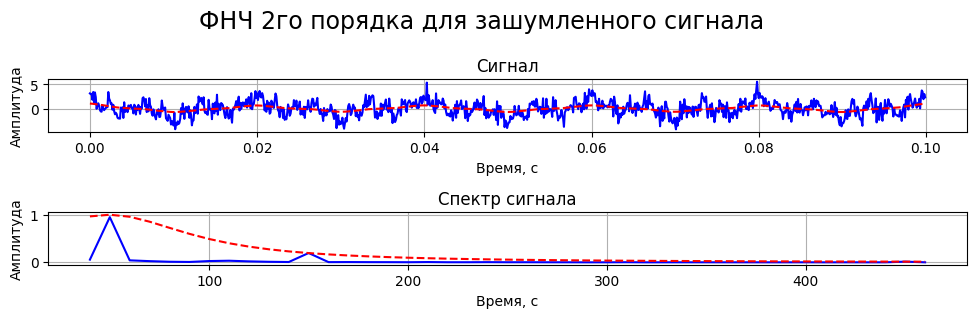

In [93]:
display.clear()

display.make_plot(0, x, y1, title = 'Сигнал')
display.make_plot(0, x, y2, color = 'red', linestyle = '--')

display.make_plot(1, xfft, yfft1, title = 'Спектр сигнала', is_spectrum = True, interval = (40, 460))
display.make_plot(1, xfft, np.abs(Hw), interval = (40, 460), color = 'red', linestyle = '--')

display.plot(title = f'ФНЧ {order}го порядка для зашумленного сигнала')

## Задание 7

In [94]:
class Chebyshev_filter:

    def __init__(self, signal: np.ndarray, dt: float):
        handler = Signal_Handler()
        self.xfft, self.yfft = handler.find_spectrum(signal, dt)

    def update_signal(self, signal : np.ndarray, dt: float):
        self.xfft, self.yfft = handler.find_spectrum(signal, dt)

    def H_w(self, w: float, wc: float, eps: float = 0.1, order: int = 2):
        
        x = w / wc

        C = np.array([binom(order, 2 * k) for k in range(order // 2)]).T
        arg1 = np.array([(x ** 2 - 1) ** k for k in range(order // 2)])
        arg2 = np.array([x ** (order - 2 * k) for k in range(order // 2)])

        T = np.sum(C * arg1 * arg2, axis = 0)

        return 1 / np.sqrt(1 + eps ** 2 * T ** 2) 

    def LPF(self, wc: np.ndarray, eps: float, order: int = 2):

        return handler.from_spectrum(np.abs(self.H_w(self.xfft, wc, eps, order) * self.yfft))

In [95]:
chebyshev = Chebyshev_filter(y, dt)

In [96]:
order = 2
wc = 70
eps = 0.1

y1 = chebyshev.LPF(wc = wc, eps = eps, order = order) 
yfft1 = handler.find_spectrum(y1, dt)[1]
Hw = chebyshev.H_w(chebyshev.xfft, wc, eps = eps, order = order)

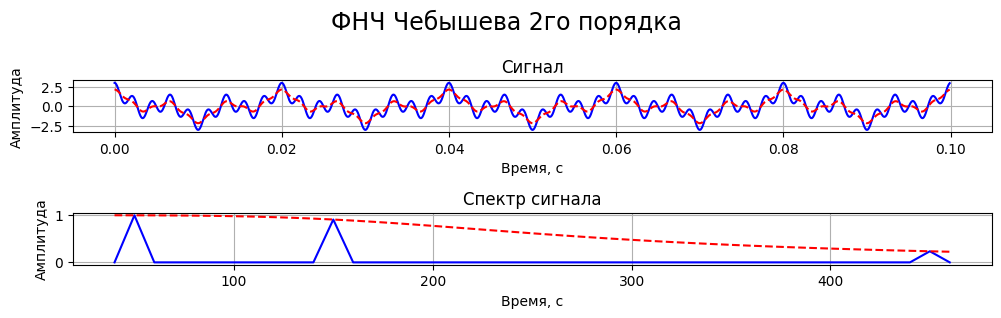

In [97]:
display.clear()

display.make_plot(0, x, y, title = 'Сигнал')
display.make_plot(0, x, y1, color = 'red', linestyle = '--')

display.make_plot(1, xfft, yfft1, title = 'Спектр сигнала', is_spectrum = True, interval = (40, 460))
display.make_plot(1, xfft, np.abs(Hw), interval = (40, 460), color = 'red', linestyle = '--')

display.plot(title = f'ФНЧ Чебышева {order}го порядка')